In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

Error loading ../src/metrics_weight_robustness_gaussianN2_encoder.json: [Errno 2] No such file or directory: '../src/metrics_weight_robustness_gaussianN2_encoder.json'
Error loading ../src/metrics_weight_robustness_gaussianN2_global.json: [Errno 2] No such file or directory: '../src/metrics_weight_robustness_gaussianN2_global.json'
Error loading ../src/metrics_weight_robustness_gaussianN2_decoder_residual.json: [Errno 2] No such file or directory: '../src/metrics_weight_robustness_gaussianN2_decoder_residual.json'
Error loading ../src/metrics_weight_robustness_gaussianN2_decoder_output.json: [Errno 2] No such file or directory: '../src/metrics_weight_robustness_gaussianN2_decoder_output.json'


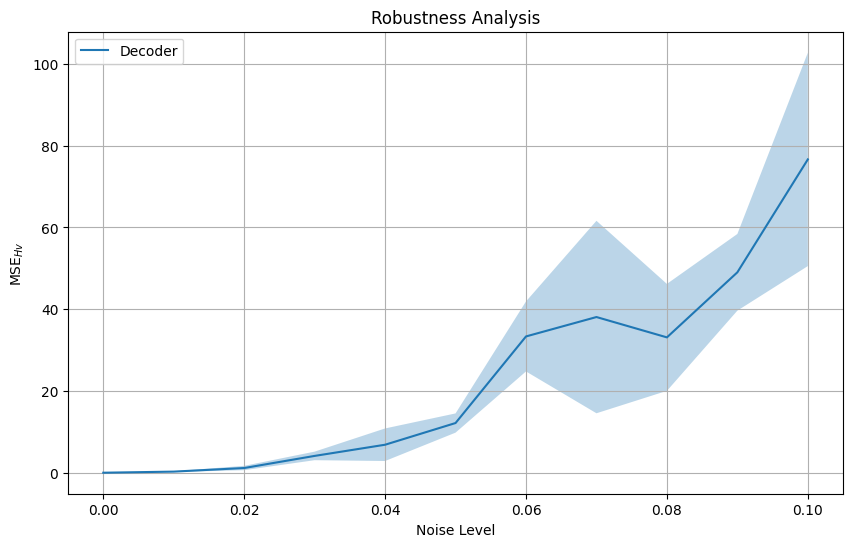

In [13]:
result_dir = '../src'
run_name = "frst_VAE_DeepSDF_20smf"
metric_name = "val_sdf_loss/dataloader_idx_0"

experiments = {
    'Encoder': "encoder",
    'Decoder': "decoder",
    'Encoder-Decoder': "global",
    'Decoder-Residual': "decoder_residual",
    'Decoder-Output': "decoder_output"
}

# noise_levels = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
noise_levels = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
# noise_levels = [0.0, 0.004, 0.008, 0.01, 0.012, 0.016, 0.02] #, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
metric_init_value = 0.00026588255423121154

plt.figure(figsize=(10, 6))

for exp_name, file_tag in experiments.items():
    # Construct the filepath for the current experiment's results JSON file
    file_path = os.path.join(result_dir, f"metrics_weight_robustness_gaussianN2_{file_tag}.json")
    try:
        with open(file_path, 'r') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        continue

    # Initialize lists for noise levels, mean values, and standard deviations
    x_vals = []
    means = []
    std_devs = []
    
    # For each noise level from the predefined list (using the string as key)
    for noise in noise_levels:
        key = str(noise)
        if key in results[run_name]:
            run_vals = np.array(results[run_name][key][metric_name], dtype=float)
            run_vals = (run_vals - metric_init_value) / metric_init_value
            x_vals.append(noise)
            means.append(np.mean(run_vals))
            std_devs.append(np.std(run_vals))
        else:
            print(f"Warning: Noise level {key} not found in {file_path}")

    # Convert lists to numpy arrays (useful for plotting)
    x_vals = np.array(x_vals)
    means = np.array(means)
    std_devs = np.array(std_devs)
    
    # Plot the mean results as a line and the variability with fill_between
    # plt.plot(x_vals, np.log(means)/np.log(2), label=exp_name)
    # plt.fill_between(x_vals, np.log(means - std_devs)/np.log(2), np.log(means + std_devs)/np.log(2), alpha=0.3)

    plt.plot(x_vals, means, label=exp_name)
    plt.fill_between(x_vals, means - std_devs, means + std_devs, alpha=0.3)


# plt.yscale('log')
plt.xlabel("Noise Level")
plt.ylabel("$\\text{MSE}_{Hv}$")
plt.title("Robustness Analysis")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
print((0.004504167940467596 - metric_init_value) / metric_init_value)

15.940441818348
